This notebook explores the SDSS-MGS observational sample.

* Target selection: https://www.sdss3.org/dr8/algorithms/target_selection.php
* Data Release: https://arxiv.org/abs/0812.0649
* NYU Value-Added Catalog: http://sdss.physics.nyu.edu/vagc/
* Power spectrum analysis: https://arxiv.org/abs/astro-ph/0608636

In [87]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import matplotlib.pyplot as plt
from os.path import join as pjoin

import astropy
from astropy.io import fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
wdir = '/home/mattho/git/ltu-cmass/data/obs/MGS'
os.listdir(wdir)

['object_sdss_spectro.fits',
 'object_sdss_spectro.fits.1',
 'object_sdss_imaging.fits',
 'object_catalog.fits',
 'lss_combmask.dr72.fits',
 'lss_geometry.dr72.fits',
 'lss_index.dr72.fits',
 'lss_random-0.dr72.fits']

In [79]:
# open lss_index.dr72.fits

with fits.open(pjoin(wdir, 'lss_index.dr72.fits')) as f:
    print(f.info())
    data = f[1].data

Filename: /home/mattho/git/ltu-cmass/data/obs/MGS/lss_index.dr72.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1                1 BinTableHDU     43   2506754R x 13C   [D, D, E, J, J, E, J, J, E, E, J, J, J]   
None


In [83]:
print(data.dtype)
np.unique(data['VAGC_SELECT'], return_counts=True)

(numpy.record, [('RA', '>f8'), ('DEC', '>f8'), ('Z', '>f4'), ('ZTYPE', '>i4'), ('SECTOR', '>i4'), ('FGOTMAIN', '>f4'), ('QUALITY', '>i4'), ('ISBAD', '>i4'), ('M', '>f4'), ('MMAX', '>f4'), ('ILSS', '>i4'), ('ICOMB', '>i4'), ('VAGC_SELECT', '>i4')])


(array([7], dtype=int32), array([608751]))

In [81]:
print(len(data))
mask = (data['ILSS'] != -1) & (data['VAGC_SELECT'] == 7)
data = data[mask]

rae = 100, 270
dece = 0, 70
mask = (rae[0] < data['RA']) & (data['RA'] < rae[1]) & (dece[0] < data['DEC']) & (data['DEC'] < dece[1])
data = data[mask]

mask = data['Z'] >=0
data = data[mask]

print(len(data))

2506754
608751


Text(0, 0.5, 'DEC')

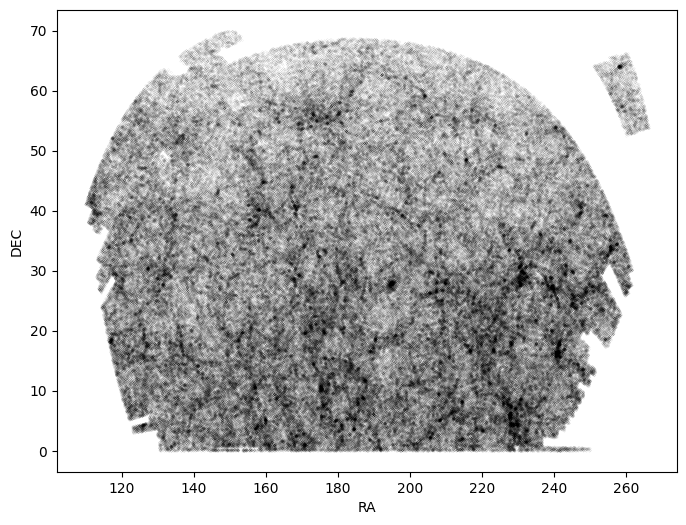

In [82]:
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(data['RA'], data['DEC'], 'k.', markersize=0.1, alpha=0.5)
# ax.set_xlim(rae)
# ax.set_ylim(dece)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

[]

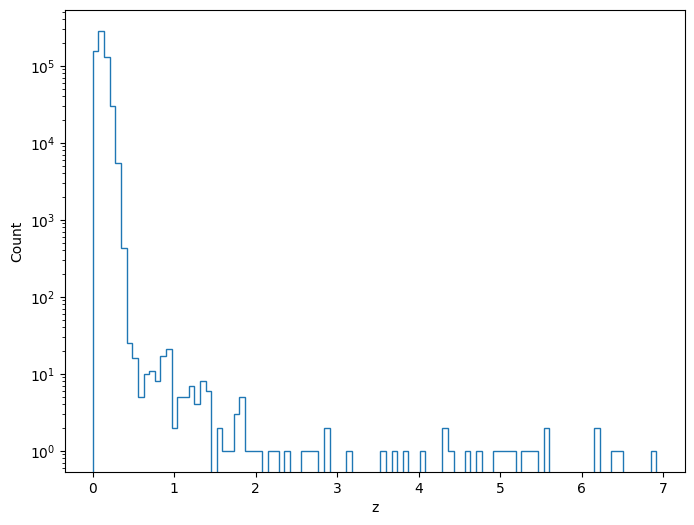

In [84]:
# plot redshift distribution
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.hist(data['Z'], bins=100, histtype='step')
ax.set_xlabel('z')
ax.set_ylabel('Count')
ax.semilogy()

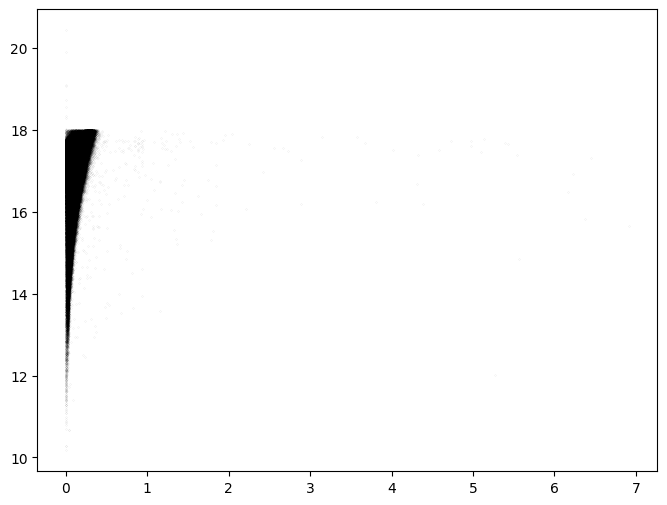

In [89]:
# plot magnitude-redshift distribution
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(data['Z'], data['M'], 'k.', markersize=0.1, alpha=0.5)

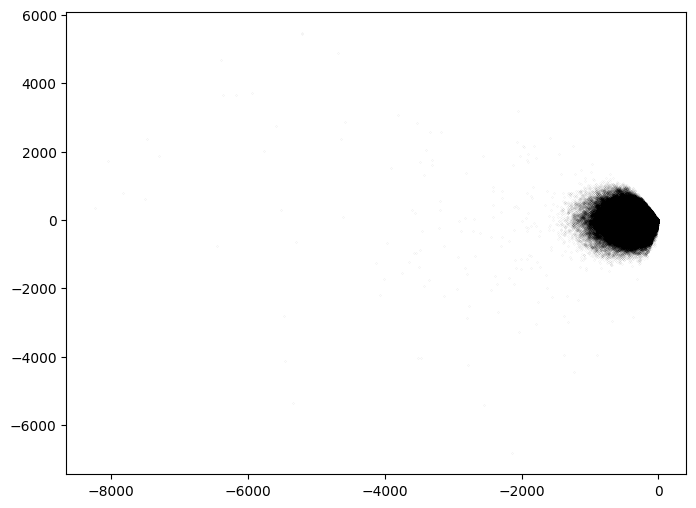

In [88]:
# plot comoving coordinates
from astropy.cosmology import Planck15
from astropy import units as u

z = data['Z']
ra = data['RA'] * u.deg
dec = data['DEC'] * u.deg
d = Planck15.comoving_distance(z)
x = d * np.cos(dec) * np.cos(ra)
y = d * np.cos(dec) * np.sin(ra)
z = d * np.sin(dec)


In [ ]:

f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x, y, 'k.', markersize=0.1, alpha=0.5)